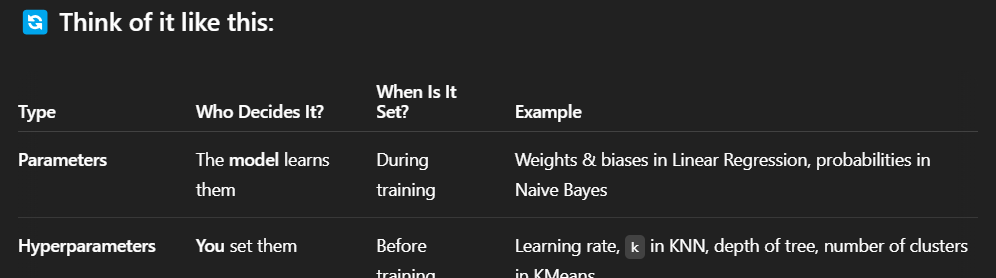

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Load data
X, y = load_iris(return_X_y=True)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']  # 'liblinear' supports both l1 and l2
}

# 4. Set up GridSearchCV
grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

# 5. Fit the model
grid.fit(X_train, y_train)

# 6. Evaluate on test set
y_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# 7. Print results
print("✅ Best Parameters:", grid.best_params_)
print("📈 Best Cross-Validation Accuracy:", grid.best_score_)
print("📊 Confusion Matrix on Test Set:\n", conf_matrix)


✅ Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
📈 Best Cross-Validation Accuracy: 0.9583333333333334
📊 Confusion Matrix on Test Set:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


C:\Users\ravit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


What GridSearchCV Does:----------
----It tries every combination of these options.
----Like a grid or Cartesian product of all possibilities.

In our case:
--2 penalty values × 5 C values × 1 solver
----= 10 total models will be trained & evaluated (cross-validated).



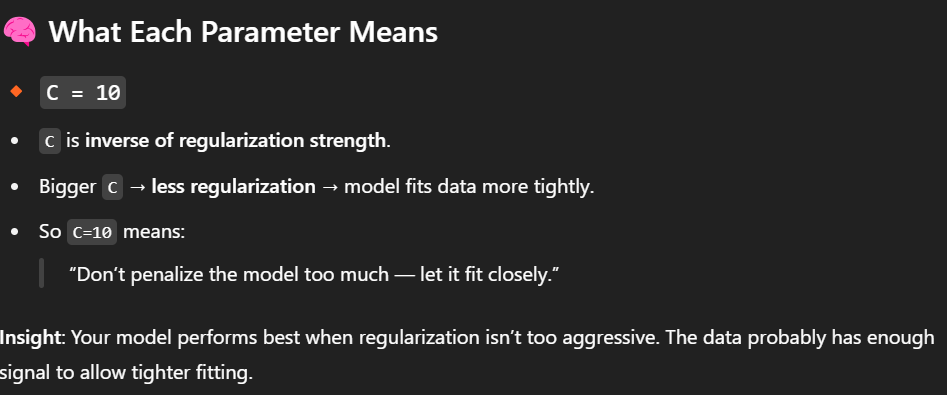
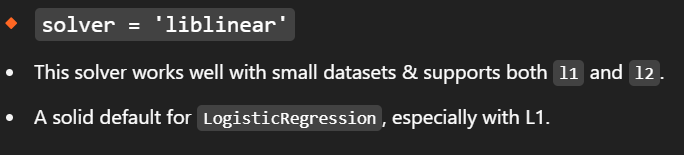
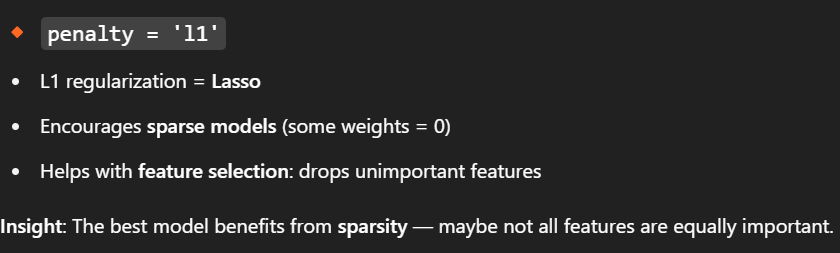


Element	                    What It Means	                                   Insight
C = 10	                    Less regularization → model fits data closely	   Data has good patterns
penalty = l1	            Sparse model → auto feature selection	           Some features less useful
score = 0.95	            High generalization accuracy	                   Model is reliable
Confusion matrix 	        Misclassifications info	                           Which classes need more clarity

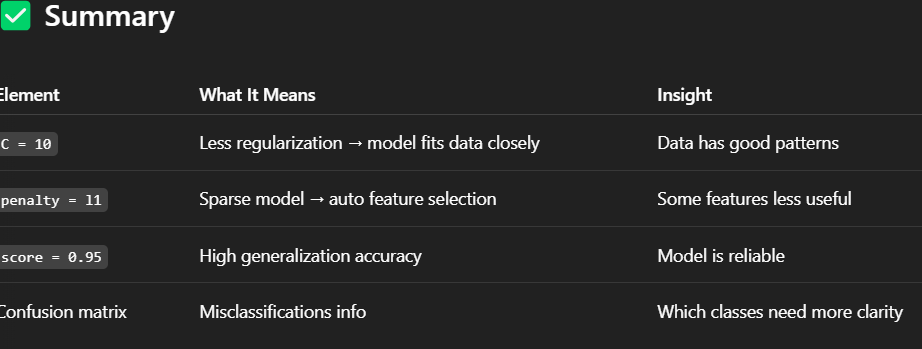

In [2]:
# tune a Decision Tree using GridSearchCV

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Load data
X, y = load_iris(return_X_y=True)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train baseline (untuned) Decision Tree
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_base)

# 4. GridSearchCV tuning
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']  # You can also use 'log_loss' in newer versions
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# 5. Evaluate tuned model
best_tree = grid.best_estimator_
y_pred_tuned = best_tree.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

# 6. Print comparison
print("🔍 Best Parameters:", grid.best_params_)
print("📈 Baseline Accuracy:", baseline_accuracy)
print("🚀 Tuned Accuracy:", tuned_accuracy)
print("📊 Confusion Matrix After Tuning:\n", confusion_matrix(y_test, y_pred_tuned))


🔍 Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
📈 Baseline Accuracy: 1.0
🚀 Tuned Accuracy: 1.0
📊 Confusion Matrix After Tuning:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [3]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# 1. Load and split data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train baseline Random Forest
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(X_train, y_train)
y_pred_base = baseline_rf.predict(X_test)

print("📊 Baseline Classification Report:")
print(classification_report(y_test, y_pred_base))

# 3. Define small parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None],
    'max_features': ['sqrt', 'log2']
}

# 4. Run GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
grid.fit(X_train, y_train)

# 5. Evaluate tuned model
best_rf = grid.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

print("🛠️ Best Parameters:", grid.best_params_)
print("🚀 Tuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))


📊 Baseline Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

🛠️ Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50}
🚀 Tuned Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

